# Deep Learning

In [18]:
# import de bibliotecas
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils as np_utils
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '0')

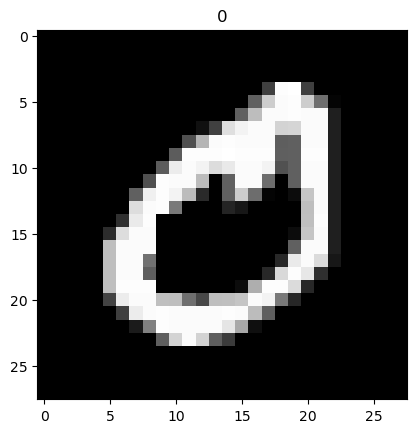

In [19]:
# Obtenção de dados para treinamento e divisão automatica entre treinamento e teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# visualização de imagens
plt.imshow(x_train[21], cmap='gray')
plt.title(y_train[21])

In [20]:
# Mudança na dimensão, originalmente em 28x28 e precisa-se de 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [21]:
# Transformação para float para normalizar os dados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:
# Normalização(255 é o valor maximo de um pixel)
x_train /= 255
x_test /= 255

In [23]:
# transformação para o formato dummy
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [24]:
# Estrutura de rede neural: 784 - 64 - 64 - 64 - 10
# Dropout utilizado para zerar uma porcentagem dos neurônios, para evitar overfitting
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
# Camada de saida, softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))

In [25]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [26]:
# Configuração dos parametros da rede neural e treinamentos (utilizando a base de dados de validação)
# Na variável historico temos os historicos das execuções (erro e accuracy)
modelo.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(x_train, y_train, epochs= 20, validation_data=(x_test, y_test))


Epoch 1/20


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4468 - accuracy: 0.8643 - val_loss: 0.1648 - val_accuracy: 0.9504
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2267 - accuracy: 0.9349 - val_loss: 0.1372 - val_accuracy: 0.9604
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1888 - accuracy: 0.9452 - val_loss: 0.1106 - val_accuracy: 0.9672
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1600 - accuracy: 0.9526 - val_loss: 0.1120 - val_accuracy: 0.9682
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1497 - accuracy: 0.9565 - val_loss: 0.0976 - val_accuracy: 0.9706
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1379 - accuracy: 0.9589 - val_loss: 0.0952 - val_accuracy: 0.9741
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1303 - accuracy: 0.9610 - val_loss: 0.0993 - val_accura

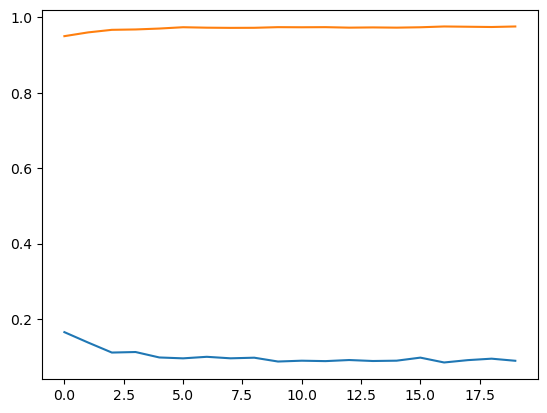

In [28]:
# Grafico de visualização de erro e accuracy
historico.history.keys()
# evolução do erro, em azul
plt.plot(historico.history['val_loss'])
#performance da rede, em laranja
plt.plot(historico.history['val_accuracy'])

In [29]:
# Obtenção das previsões
previsoes = modelo.predict(x_test)
previsoes

313/313 [==============================] - 1s 2ms/step


array([[8.1664886e-10, 1.2956151e-07, 3.1802010e-05, ..., 9.9990451e-01,
        4.7235218e-08, 5.4005544e-05],
       [6.7325331e-08, 2.6996400e-05, 9.9990451e-01, ..., 1.7784283e-06,
        2.2902514e-06, 5.0201011e-13],
       [1.9153396e-11, 9.9996746e-01, 4.2803384e-07, ..., 2.9586899e-05,
        1.8727461e-06, 2.9193405e-11],
       ...,
       [4.7472176e-10, 1.9001569e-09, 1.5342385e-07, ..., 1.2891815e-07,
        1.7209730e-09, 3.5147095e-06],
       [7.6824160e-20, 5.0245195e-16, 6.5191932e-18, ..., 5.2088823e-20,
        1.9631001e-10, 2.5093924e-14],
       [8.5393178e-13, 3.7804392e-18, 1.1307224e-14, ..., 6.5079146e-25,
        3.3088387e-13, 8.7196014e-22]], dtype=float32)

In [30]:
# Valor maximo (com a probabilidade maior por serem 10 saídas) e geração de matriz de confusão
y_test_matriz = [np.argmax(t) for t in y_test]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_test_matriz, y_previsoes_matriz)
confusao

array([[ 966,    0,    2,    0,    0,    2,    4,    3,    3,    0],
       [   0, 1124,    3,    1,    0,    2,    2,    0,    3,    0],
       [   1,    1, 1013,    2,    0,    0,    0,    7,    8,    0],
       [   1,    0,   10,  976,    0,   12,    0,    5,    3,    3],
       [   0,    0,    3,    0,  959,    0,    7,    2,    0,   11],
       [   2,    0,    0,    5,    1,  869,   10,    1,    3,    1],
       [   4,    3,    1,    0,    5,    4,  938,    0,    3,    0],
       [   0,    1,   11,    1,    1,    0,    0, 1011,    0,    3],
       [   4,    3,    7,    6,    3,    2,    3,    5,  939,    2],
       [   3,    4,    0,    5,   12,    2,    0,   14,    3,  966]],
      dtype=int64)

In [31]:
# previsão com um novo registro, convertendo o array para o formato de matriz
# numero 4
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
# passar a mesma posição para o modelo prever
novo = x_train[20]
# de matriz para vetor
novo = np.expand_dims(novo, axis=0)
# previsão
pred  = modelo.predict(novo)
# maior valor
pred = [np.argmax(t) for t in pred]
pred

1/1 [==============================] - 0s 31ms/step


[4]